<h1 align="center">Computational Methods in Environmental Engineering</h1>
<h2 align="center">Lecture #20</h2>
<h3 align="center">9 May 2023</h3>



## Cloud computing



-   On-demand availability of computing resources
-   Scaling based on workload
-   Can be cost-effective
-   System administration and upgradability



## Run Python on the cloud



-   [Google Colab](https://colab.research.google.com/)
-   [Google Cloud](https://medium.com/@kn.maragatham09/installing-jupyter-notebook-on-google-cloud-11979e40cd10)
-   [Amazon Web Services](https://docs.aws.amazon.com/dlami/latest/devguide/setup-jupyter.html)
-   [Microsoft Azure](https://notebooks.azure.com/)
-   [Binder](https://mybinder.org/)
-   [Google Colaboratory](https://colab.research.google.com/)
-   [Kaggle Kernels](https://www.kaggle.com/kernels)



## Analytics on the cloud



-   Deploy computing resources on the cloud
-   But what if we want to perform operations within frameworks on the cloud?
-   We will focus on Google Earth Engine but other solutions exist



## Google Earth Engine



<center><img src='https://www.gislounge.com/wp-content/uploads/2018/06/google-earth-engine.jpg'/></center>



## Many available datasets



Let's [take a look&#x2026;](https://developers.google.com/earth-engine/datasets/)



## Code Editor



One way to access [Google Earth Engine](https://code.earthengine.google.com/)



## Let's install the GEE Python API



In [1]:
%conda install -y -c conda-forge google-api-python-client earthengine-api folium geemap
!earthengine authenticate
# instead of the line above, you can try the following
# import ee
# ee.Authenticate()

## Let's test the installation



In [1]:
import ee
ee.Initialize()
srtm = ee.Image('srtm90_v4')
print(srtm.getInfo())

{'type': 'Image', 'bands': [{'id': 'elevation', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': -32768, 'max': 32767}, 'dimensions': [432000, 144000], 'crs': 'EPSG:4326', 'crs_transform': [0.000833333333333, 0, -180, 0, -0.000833333333333, 60]}], 'version': 1494271934303000.0, 'id': 'srtm90_v4', 'properties': {'system:time_start': 950227200000, 'system:time_end': 951177600000, 'system:asset_size': 18827626666}}


## Can we look at maps?



-   Visualization used to be a bit bit limited with Python
-   In some cases, the Code Editor might be better suited for our analysis
-   We can use [folium](https://github.com/python-visualization/folium) or [geemap](https://github.com/giswqs/geemap) for visualization



### Folium



In [1]:
import folium

class eeMap(folium.Map):
    def add_layer(self, eeImageObject, visParams, name):
        map_id_dict = ee.Image(eeImageObject).getMapId(visParams)
        folium.raster_layers.TileLayer(
            tiles = map_id_dict['tile_fetcher'].url_format,
            attr = "Map Data &copy; <a href='https://earthengine.google.com/'>Google Earth Engine</a>",
            name = name,
            overlay = True,
            control = True
        ).add_to(self)

### By default, the image will have global extent so let's try to visualize a region



In [2]:
import geemap
point = ee.Geometry.Point(-72.5199, 42.373)
region_amherst_area = point.buffer(500000).bounds().getInfo()['coordinates']
fmap = geemap.Map(center=[42.3, -72.5], zoom=9)
fmap.addLayer(srtm, {'min': 0, 'max': 1000}, "srtm")
fmap

Map(center=[42.3, -72.5], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children…

## Working with image collections



Let's go to the [Earth Engine Public Data Catalog](https://earthengine.google.org/#index) and look for the Landsat-8 TOA reflectance data



## Create a reference to the image collection



In [3]:
l8 = ee.ImageCollection('LANDSAT/LC8_L1T_TOA')

## Filter the collection for a year



In [4]:
filtered = l8.filterBounds(point).filterDate('2013-01-01', '2013-12-31')
print(filtered.getInfo())

{'type': 'ImageCollection', 'bands': [{'id': 'B1', 'data_type': {'type': 'PixelType', 'precision': 'float'}}, {'id': 'B2', 'data_type': {'type': 'PixelType', 'precision': 'float'}}, {'id': 'B3', 'data_type': {'type': 'PixelType', 'precision': 'float'}}, {'id': 'B4', 'data_type': {'type': 'PixelType', 'precision': 'float'}}, {'id': 'B5', 'data_type': {'type': 'PixelType', 'precision': 'float'}}, {'id': 'B6', 'data_type': {'type': 'PixelType', 'precision': 'float'}}, {'id': 'B7', 'data_type': {'type': 'PixelType', 'precision': 'float'}}, {'id': 'B8', 'data_type': {'type': 'PixelType', 'precision': 'float'}}, {'id': 'B9', 'data_type': {'type': 'PixelType', 'precision': 'float'}}, {'id': 'B10', 'data_type': {'type': 'PixelType', 'precision': 'float'}}, {'id': 'B11', 'data_type': {'type': 'PixelType', 'precision': 'float'}}, {'id': 'BQA', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': 0, 'max': 65535}}], 'id': 'LANDSAT/LC8_L1T_TOA', 'version': 1655337564195579, 'properties': 

## Mosaic the images and calculate the median



In [5]:
l8_image = filtered.median()
print(l8_image.getInfo())

{'type': 'Image', 'bands': [{'id': 'B1', 'data_type': {'type': 'PixelType', 'precision': 'float'}, 'crs': 'EPSG:4326', 'crs_transform': [1, 0, 0, 0, 1, 0]}, {'id': 'B2', 'data_type': {'type': 'PixelType', 'precision': 'float'}, 'crs': 'EPSG:4326', 'crs_transform': [1, 0, 0, 0, 1, 0]}, {'id': 'B3', 'data_type': {'type': 'PixelType', 'precision': 'float'}, 'crs': 'EPSG:4326', 'crs_transform': [1, 0, 0, 0, 1, 0]}, {'id': 'B4', 'data_type': {'type': 'PixelType', 'precision': 'float'}, 'crs': 'EPSG:4326', 'crs_transform': [1, 0, 0, 0, 1, 0]}, {'id': 'B5', 'data_type': {'type': 'PixelType', 'precision': 'float'}, 'crs': 'EPSG:4326', 'crs_transform': [1, 0, 0, 0, 1, 0]}, {'id': 'B6', 'data_type': {'type': 'PixelType', 'precision': 'float'}, 'crs': 'EPSG:4326', 'crs_transform': [1, 0, 0, 0, 1, 0]}, {'id': 'B7', 'data_type': {'type': 'PixelType', 'precision': 'float'}, 'crs': 'EPSG:4326', 'crs_transform': [1, 0, 0, 0, 1, 0]}, {'id': 'B8', 'data_type': {'type': 'PixelType', 'precision': 'float'}

## Let's create a map



In [6]:
fmap = geemap.Map(center=[42.3, -72.5], zoom=9)
fmap.addLayer(l8_image, {}, "Landsat median")
fmap

Map(center=[42.3, -72.5], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children…

## True-color image



In [7]:
fmap = geemap.Map(center=[42.3, -72.5], zoom=9)
fmap.addLayer(l8_image, {'bands': ['B4', 'B3', "B2"],
                          'min': 0,
                          'max': 0.3}, 'true-color')
fmap

Map(center=[42.3, -72.5], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children…

## False-color image



In [8]:
fmap = geemap.Map(center=[42.3, -72.5], zoom=9)
fmap.addLayer(l8_image, {'bands': ['B4', 'B3', "B2"],
                          'min': 0,
                          'max': 0.3}, 'true-color')
fmap.addLayer(l8_image, {'bands': ['B5', 'B4', "B3"],
                          'min': 0,
                          'max': 0.3}, 'false-color')
fmap.addLayerControl()

In [9]:
fmap

Map(center=[42.3, -72.5], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children…

## Time series analysis with Landsat data



In [10]:
%matplotlib inline
import datetime
import numpy as np
from matplotlib import dates
import matplotlib.dates as mdates

Define the bands we'd like to plot and the time period



In [11]:
xBand = 'time'
yBandList = ['B1', 'B2', 'B3', 'B4', 'B5']
startTime = datetime.datetime(2014, 1, 1)
endTime = datetime.datetime(2017, 1, 1)

Construct a filtered image collection (let's pick Landsat-8) and extract information for a specific point



In [12]:
collection = ee.ImageCollection('LANDSAT/LC08/C01/T1_SR').filterDate(startTime, endTime)
point = {'type':'Point', 'coordinates':[ -116.88629, 36.56122]};  # death valley (should be stable)
info = collection.getRegion(point,500).getInfo()

In [13]:
info

[['id',
  'longitude',
  'latitude',
  'time',
  'B1',
  'B2',
  'B3',
  'B4',
  'B5',
  'B6',
  'B7',
  'B10',
  'B11',
  'sr_aerosol',
  'pixel_qa',
  'radsat_qa'],
 ['LC08_040035_20140101',
  -116.88653898142185,
  36.55918627545423,
  1388600588630,
  854,
  942,
  1162,
  1482,
  1802,
  2156,
  1930,
  2914,
  2907,
  66,
  322,
  0],
 ['LC08_040035_20140117',
  -116.88653898142185,
  36.55918627545423,
  1389982974140,
  876,
  963,
  1178,
  1490,
  1785,
  2118,
  1913,
  2950,
  2945,
  96,
  322,
  0],
 ['LC08_040035_20140202',
  -116.88653898142185,
  36.55918627545423,
  1391365368040,
  797,
  885,
  1098,
  1379,
  1655,
  1910,
  1726,
  2902,
  2888,
  96,
  322,
  0],
 ['LC08_040035_20140218',
  -116.88653898142185,
  36.55918627545423,
  1392747754440,
  3464,
  3505,
  3568,
  3751,
  3915,
  3245,
  3080,
  2452,
  2428,
  8,
  992,
  0],
 ['LC08_040035_20140306',
  -116.88653898142185,
  36.55918627545423,
  1394130139570,
  1389,
  1422,
  1572,
  1816,
  2059,
 

### What is contained in info?



In [14]:
header = info[0]
header

['id',
 'longitude',
 'latitude',
 'time',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'B6',
 'B7',
 'B10',
 'B11',
 'sr_aerosol',
 'pixel_qa',
 'radsat_qa']

In [15]:
data = np.array(info[1:])
data.shape

(203, 16)

### Get the time information



In [16]:
it = header.index('time')
time = np.array([datetime.datetime.fromtimestamp(i/1000) for i in (data[:, it].astype(float))])
time

array([datetime.datetime(2014, 1, 1, 13, 23, 8, 630000),
       datetime.datetime(2014, 1, 17, 13, 22, 54, 140000),
       datetime.datetime(2014, 2, 2, 13, 22, 48, 40000),
       datetime.datetime(2014, 2, 18, 13, 22, 34, 440000),
       datetime.datetime(2014, 3, 6, 13, 22, 19, 570000),
       datetime.datetime(2014, 3, 22, 14, 22, 7, 930000),
       datetime.datetime(2014, 4, 7, 14, 21, 53, 430000),
       datetime.datetime(2014, 4, 23, 14, 21, 37, 290000),
       datetime.datetime(2014, 5, 9, 14, 21, 21, 820000),
       datetime.datetime(2014, 5, 25, 14, 21, 16, 700000),
       datetime.datetime(2014, 6, 10, 14, 21, 26, 630000),
       datetime.datetime(2014, 6, 26, 14, 21, 27, 850000),
       datetime.datetime(2014, 7, 12, 14, 21, 37, 180000),
       datetime.datetime(2014, 7, 28, 14, 21, 41),
       datetime.datetime(2014, 8, 13, 14, 21, 48, 820000),
       datetime.datetime(2014, 8, 29, 14, 21, 50, 110000),
       datetime.datetime(2014, 9, 14, 14, 21, 53, 880000),
       dateti

### Extract the data (bands) we want



In [17]:
iBands = [header.index(b) for b in yBandList]
yData = data[0:,iBands].astype(np.float)

In [18]:
iBands

[4, 5, 6, 7, 8]

### Plot Bands 3 and 4



Text(0, 0.5, 'Band Values')

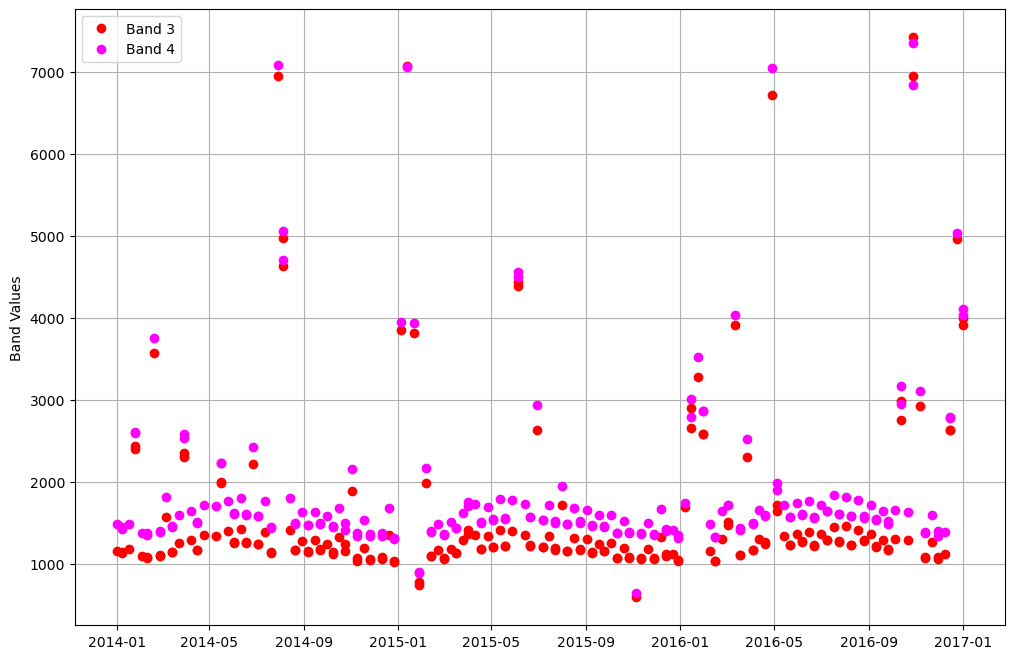

In [19]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(111)
ax1.plot(time, yData[:,2], 'o', color="red", label="Band 3")
ax1.plot(time, yData[:,3], 'o', color="magenta",  label="Band 4")
ax1.legend(loc='best')
ax1.grid(True)
ax1.set_ylabel('Band Values')

## Let's calculate a vegetation index



NDVI is given by $$\frac{NIR - RED}{NIR + RED}$$



Let's calculate it



In [20]:
band3 = yData[:, 2]
band5 = yData[:, 4]
ndvi = (band5 - band3) / (band5 + band3)

Text(0, 0.5, 'NDVI')

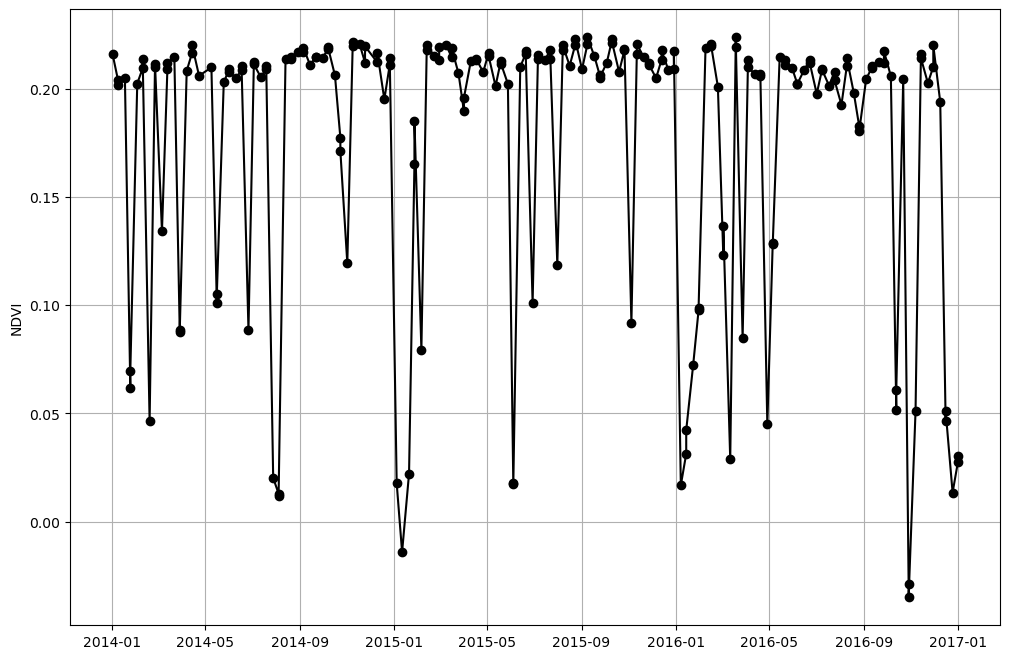

In [21]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(111)
i = np.argsort(time)
ax1.plot(time[i], ndvi[i], '-o', color="black", label="NDVI")
ax1.grid(True)
ax1.set_ylabel('NDVI')

## What if we want to calculate NDVI images?



We will write a function that calculated NDVI



In [22]:
def AddBandNDVI(img):
    red = img.select('B3')
    nir = img.select('B5')
    ndvi = (nir.subtract(red)).divide(nir.add(red)).rename('ndvi')
    return img.addBands(ndvi)

In [23]:
ndvi = collection.map(AddBandNDVI)
print(ndvi.select('ndvi').getRegion(point, 500).getInfo())

[['id', 'longitude', 'latitude', 'time', 'ndvi'], ['LC08_040035_20140101', -116.88653898142185, 36.55918627545423, 1388600588630, 0.21592442645074225], ['LC08_040035_20140117', -116.88653898142185, 36.55918627545423, 1389982974140, 0.20485993925075938], ['LC08_040035_20140202', -116.88653898142185, 36.55918627545423, 1391365368040, 0.20232473665092626], ['LC08_040035_20140218', -116.88653898142185, 36.55918627545423, 1392747754440, 0.04637177602565816], ['LC08_040035_20140306', -116.88653898142185, 36.55918627545423, 1394130139570, 0.13412283117598459], ['LC08_040035_20140322', -116.88653898142185, 36.55918627545423, 1395512527930, 0.21455457967377667], ['LC08_040035_20140407', -116.88653898142185, 36.55918627545423, 1396894913430, 0.2081807081807082], ['LC08_040035_20140423', -116.88653898142185, 36.55918627545423, 1398277297290, 0.20588235294117646], ['LC08_040035_20140509', -116.88653898142185, 36.55918627545423, 1399659681820, 0.20976757869961754], ['LC08_040035_20140525', -116.886

## Visualize the NDVI map



In [26]:
img = ndvi.select('ndvi').median()
fmap = geemap.Map(center=[42.3, -72.5], zoom=9)
fmap.addLayer(img,  {'min': -1, 'max': 1, 'palette': ['blue', 'white', 'green']}, 'NDVI')
fmap.addLayerControl()
fmap

Map(center=[42.3, -72.5], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children…